## Clustering

The main goal of applying clustering techniques to this dataset is to see if any symptoms or diseases can be grouped together. This can be useful for identifying similarities between symptoms/diseases.  

### Obtaining results from EDA

In [12]:
import pandas as pd
import numpy as np
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns
    
# Downloading the csv file from your GitHub account, training data
url = "https://raw.githubusercontent.com/allison2368/STA141C_FinalProject/main/Training.csv" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

df_train = pd.read_csv(io.StringIO(download.decode('utf-8')))


url_test = "https://raw.githubusercontent.com/allison2368/STA141C_FinalProject/main/Testing.csv" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url_test).content

# Reading the downloaded content and turning it into a pandas dataframe

df_test = pd.read_csv(io.StringIO(download.decode('utf-8')))

# Printing out the first 5 rows of the dataframe of test and training data


print(df_train.head())
print(df_test.head())
df = pd.concat([df_train, df_test])

# how many symptoms? 
# remove the empty column 
nan_value = float("NaN") 
df.replace("", nan_value, inplace=True) 
  
df.dropna(how='all', axis=1, inplace=True)

# count the number of symptoms 
symptoms = df.drop(columns=['prognosis'])

# Count the number of symptoms
num_symptoms = len(symptoms.columns)

print("Number of symptoms:", num_symptoms)


# how many observations in both training and testing?
print("Size of training data:", len(df_train))
print("Size of testing data:", len(df_test))
#print (df.head())

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  scurring  \
0       0           0             0        0                 0  ...         0   
1       0           0             0        0                 0  ...         0   
2       0           0             0        0                 0  ...         0   
3       0           0             0        0                 0  ...         0   
4       0           0             0        0                 0  ...         0   

   skin_peeling  silver_like_dusting  

We will now conduct exploratory data analysis to see what the data looks like 

In [13]:
# Extract symptoms columns
symptoms = df.drop(columns=['prognosis'])

# list all of the symptons
for i in symptoms.columns:
	print(i)

itching
skin_rash
nodal_skin_eruptions
continuous_sneezing
shivering
chills
joint_pain
stomach_pain
acidity
ulcers_on_tongue
muscle_wasting
vomiting
burning_micturition
spotting_ urination
fatigue
weight_gain
anxiety
cold_hands_and_feets
mood_swings
weight_loss
restlessness
lethargy
patches_in_throat
irregular_sugar_level
cough
high_fever
sunken_eyes
breathlessness
sweating
dehydration
indigestion
headache
yellowish_skin
dark_urine
nausea
loss_of_appetite
pain_behind_the_eyes
back_pain
constipation
abdominal_pain
diarrhoea
mild_fever
yellow_urine
yellowing_of_eyes
acute_liver_failure
fluid_overload
swelling_of_stomach
swelled_lymph_nodes
malaise
blurred_and_distorted_vision
phlegm
throat_irritation
redness_of_eyes
sinus_pressure
runny_nose
congestion
chest_pain
weakness_in_limbs
fast_heart_rate
pain_during_bowel_movements
pain_in_anal_region
bloody_stool
irritation_in_anus
neck_pain
dizziness
cramps
bruising
obesity
swollen_legs
swollen_blood_vessels
puffy_face_and_eyes
enlarged_thyroi

In [14]:
# since the data is binary coded, we will look at a summary that is more appropriate for binary data
# Extract symptoms columns
symptoms = df.drop(columns=['prognosis'])

# Calculate count of 1s and 0s for each symptom
symptom_counts = symptoms.sum()  # Sum across rows to count occurrences of 1s (presence)

# Calculate proportion of 1s for each symptom
symptom_proportions = symptom_counts / len(symptoms)

# Create a DataFrame to display the summary
summary_df = pd.DataFrame({
    'Count_of_1s': symptom_counts,
    'Count_of_0s': len(symptoms) - symptom_counts,
    'Proportion_of_1s': symptom_proportions
})
summary_df = summary_df.sort_values('Count_of_1s', ascending=False)
# Print the summary
#print(summary_df)
print("Top ten most common symptoms", summary_df[['Count_of_1s']].iloc[:10])


# Find the top 10 counts of diseases
top_10_counts = df['prognosis'].value_counts().head(10)

print("Top 10 counts of diseases:")
print(top_10_counts)

Top ten most common symptoms                    Count_of_1s
fatigue                   1949
vomiting                  1931
high_fever                1374
loss_of_appetite          1162
nausea                    1156
headache                  1144
abdominal_pain            1041
yellowish_skin             920
yellowing_of_eyes          823
chills                     805
Top 10 counts of diseases:
Fungal infection                122
Hepatitis C                     121
Hepatitis E                     121
Alcoholic hepatitis             121
Tuberculosis                    121
Common Cold                     121
Pneumonia                       121
Dimorphic hemmorhoids(piles)    121
Heart attack                    121
Varicose veins                  121
Name: prognosis, dtype: int64


### Transforming data into count data for both symptoms and diseases

In [15]:
summary_df.index.name = "symptoms"
summary_df

,Count_of_1s,Count_of_0s,Proportion_of_1s
symptoms,,,
fatigue,1949,3013,0.392785
vomiting,1931,3031,0.389158
high_fever,1374,3588,0.276904
loss_of_appetite,1162,3800,0.234180
nausea,1156,3806,0.232971
...,...,...,...
extra_marital_contacts,109,4853,0.021967
spinning_movements,109,4853,0.021967
weakness_of_one_body_side,109,4853,0.021967


In [16]:
symptom_count = summary_df["Count_of_1s"]
symptom_count

symptoms
fatigue                      1949
vomiting                     1931
high_fever                   1374
loss_of_appetite             1162
nausea                       1156
                             ... 
extra_marital_contacts        109
spinning_movements            109
weakness_of_one_body_side     109
foul_smell_of urine           103
fluid_overload                  0
Name: Count_of_1s, Length: 132, dtype: int64

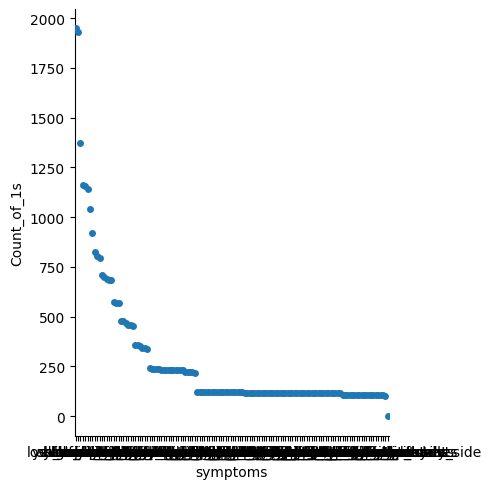

In [17]:
sns.catplot(data = summary_df, x = "symptoms", y = "Count_of_1s")

### Performing Hierarchial Clustering

In [18]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import \
    (dendrogram,
    cut_tree)
from ISLP.cluster import compute_linkage

In [23]:
HClust = AgglomerativeClustering

# Complete Linkage
hc_comp = HClust(distance_threshold = 0,
                 n_clusters = None,
                 linkage='complete')
hc_comp.fit(summary_df)

# Single Linkage
hc_sing = HClust(distance_threshold = 0,
                 n_clusters = None,
                 linkage='single')
hc_sing.fit(summary_df)

# Average Linkage
hc_avg = HClust(distance_threshold = 0,
                 n_clusters = None,
                 linkage='average')
hc_avg.fit(summary_df)

AgglomerativeClustering(distance_threshold=0, linkage='average',
                        n_clusters=None)

{'icoord': [[195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [175.0, 175.0, 192.5, 192.5],
  [165.0, 165.0, 183.75, 183.75],
  [155.0, 155.0, 174.375, 174.375],
  [145.0, 145.0, 164.6875, 164.6875],
  [135.0, 135.0, 154.84375, 154.84375],
  [125.0, 125.0, 144.921875, 144.921875],
  [115.0, 115.0, 134.9609375, 134.9609375],
  [105.0, 105.0, 124.98046875, 124.98046875],
  [95.0, 95.0, 114.990234375, 114.990234375],
  [85.0, 85.0, 104.9951171875, 104.9951171875],
  [75.0, 75.0, 94.99755859375, 94.99755859375],
  [65.0, 65.0, 84.998779296875, 84.998779296875],
  [55.0, 55.0, 74.9993896484375, 74.9993896484375],
  [45.0, 45.0, 64.99969482421875, 64.99969482421875],
  [35.0, 35.0, 54.999847412109375, 54.999847412109375],
  [25.0, 25.0, 44.99992370605469, 44.99992370605469],
  [15.0, 15.0, 34.999961853027344, 34.999961853027344],
  [215.0, 215.0, 225.0, 225.0],
  [605.0, 605.0, 615.0, 615.0],
  [595.0, 595.0, 610.0, 610.0],
  [585.0, 585.0, 602.5, 602.5],
  [575.0, 575.0, 593.7

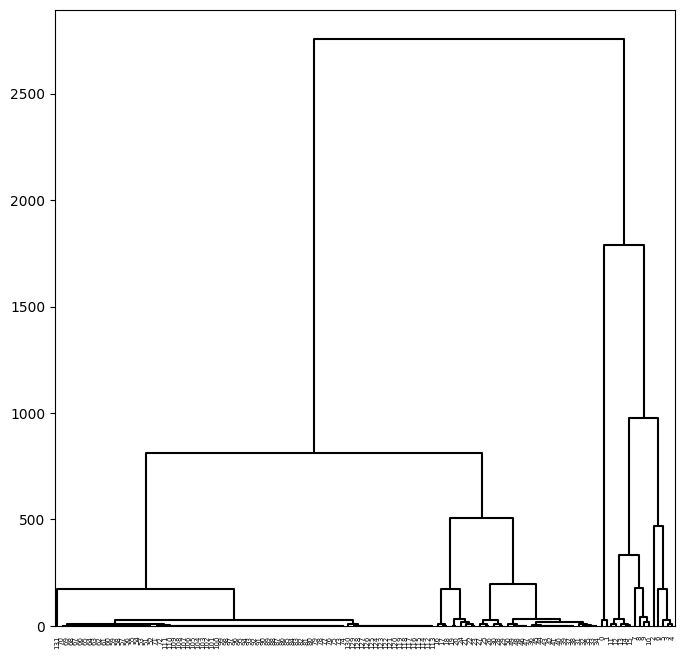

In [21]:
cargs = {'color_threshold': -np.inf,
         'above_threshold_color': 'black'}
# Dendrogram for complete linkage
linkage_comp = compute_linkage(hc_comp)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp,
           ax = ax,
           **cargs)

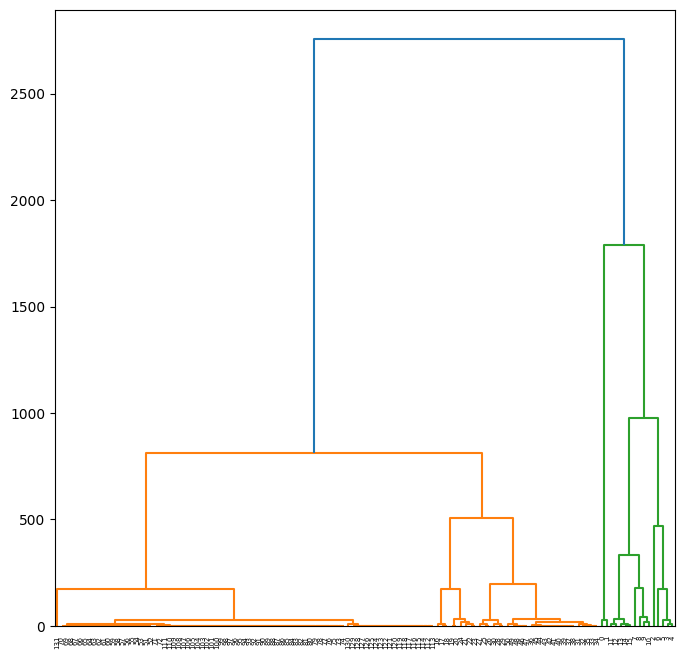

In [32]:
# Colored Dendrogram for complete linkage
fig, ax = plt.subplots(1,1, figsize=(8,8))
dendrogram(linkage_comp,
           ax = ax);

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [40.0, 40.0, 55.0, 55.0],
  [47.5, 47.5, 65.0, 65.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [115.0, 115.0, 125.0, 125.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [120.0, 120.0, 142.5, 142.5],
  [92.5, 92.5, 131.25, 131.25],
  [75.0, 75.0, 111.875, 111.875],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [195.0, 195.0, 205.0, 205.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [222.5, 222.5, 245.0, 245.0],
  [200.0, 200.0, 233.75, 233.75],
  [172.5, 172.5, 216.875, 216.875],
  [255.0, 255.0, 265.0, 265.0],
  [260.0, 260.0, 275.0, 275.0],
  [285.0, 285.0, 295.0, 295.0],
  [267.5, 267.5, 290.0, 290.0],
  [278.75, 278.75, 305.0, 305.0],
  [194.6875, 194.6875, 291.875, 291.875],
  [335.0, 335.0, 345.0, 345.0],
  [340.0, 340.0, 355.0, 355.0],
  [325.0, 325.0, 347.5, 347.5],
  [315.0, 315.0, 336.25, 336.25],
  [375.0, 375.0, 385.0, 385.0]

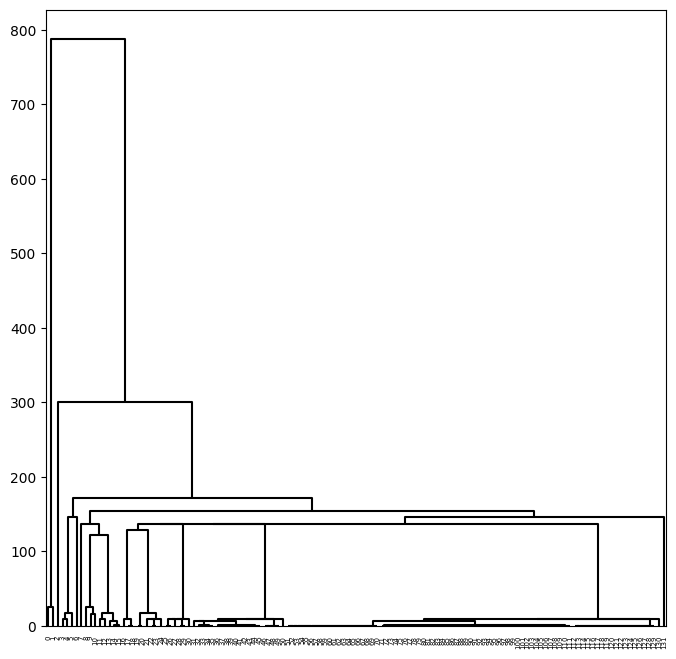

In [24]:
# Dendrogram for single linkage
linkage_sing = compute_linkage(hc_sing)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_sing,
           ax = ax,
           **cargs)

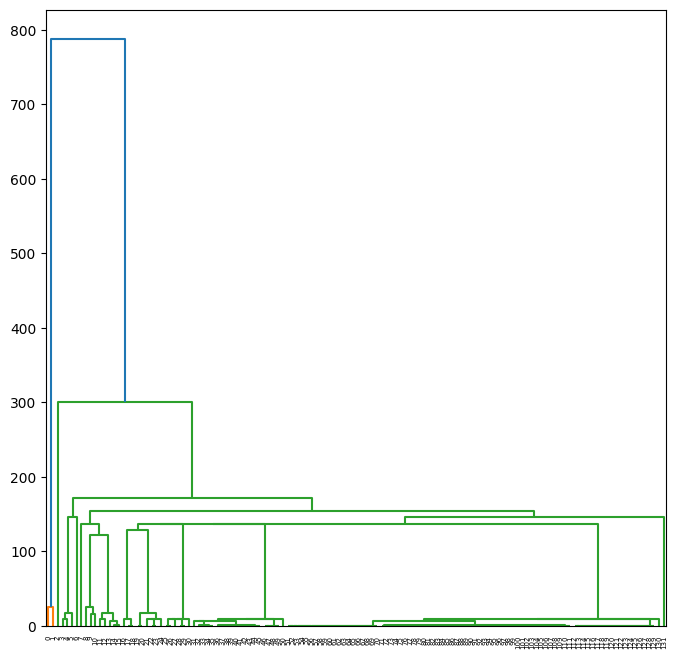

In [33]:
# Colored Dendrogram for single linkage
fig, ax = plt.subplots(1,1, figsize=(8,8))
dendrogram(linkage_sing,
           ax = ax);

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [25.0, 25.0, 43.75, 43.75],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [135.0, 135.0, 152.5, 152.5],
  [125.0, 125.0, 143.75, 143.75],
  [115.0, 115.0, 134.375, 134.375],
  [105.0, 105.0, 124.6875, 124.6875],
  [95.0, 95.0, 114.84375, 114.84375],
  [85.0, 85.0, 104.921875, 104.921875],
  [75.0, 75.0, 94.9609375, 94.9609375],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [185.0, 185.0, 202.5, 202.5],
  [175.0, 175.0, 193.75, 193.75],
  [84.98046875, 84.98046875, 184.375, 184.375],
  [34.375, 34.375, 134.677734375, 134.677734375],
  [415.0, 415.0, 425.0, 425.0],
  [405.0, 405.0, 420.0, 420.0],
  [395.0, 395.0, 412.5, 412.5],
  [385.0, 385.0, 403.75, 403.75],
  [375.0, 375.0, 394.375, 394.375],
  [365.0, 365.0, 384.6875, 384.6875],
  [355.0, 355.0, 374.84375, 374.84375],
  [345.0, 345.0, 364.921875, 364.921875],
  [335.0, 335.

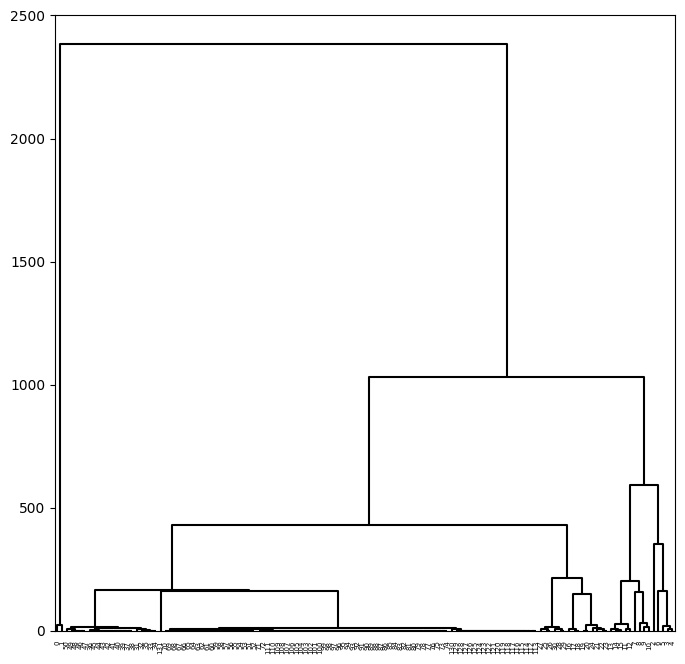

In [25]:
# Dendrogram for average linkage
linkage_avg = compute_linkage(hc_avg)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_avg,
           ax = ax,
           **cargs)

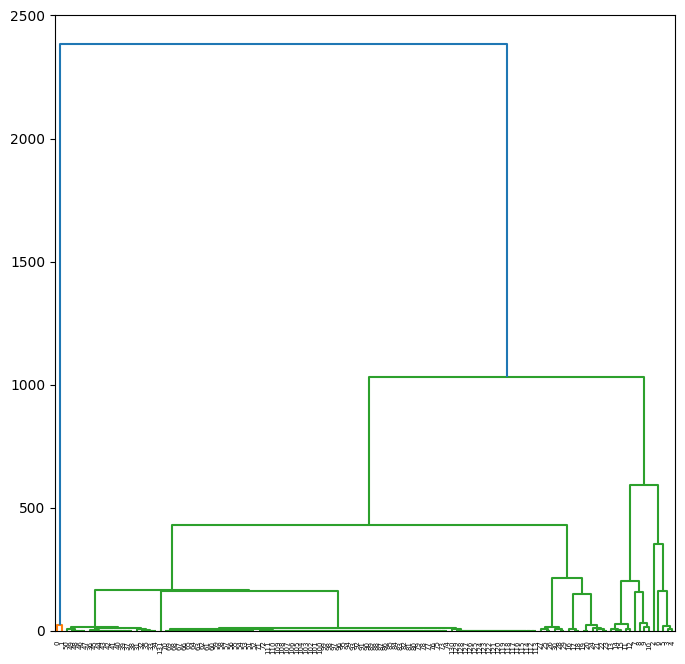

In [34]:
# Colored dendrogram for average linkage
fig, ax = plt.subplots(1,1, figsize=(8,8))
dendrogram(linkage_avg,
           ax = ax);